## Pedestrian Data Cleaning

This dataset focuses on pedestrian data in New York city, and will potentially be used to predict foot traffic in Manhattan. Pedestrian counts taken from 7-9am and 4-7pm.

Taken from https://www.nyc.gov/html/dot/html/about/datafeeds.shtml#trafficcounts

Metadata: https://www.nyc.gov/html/dot/downloads/pdf/bi-annual-ped-count-readme.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#Read data frame from csv file
df = pd.read_csv('archive/PedCountLocationsMay2015.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

#Read size from csv
df.shape

(114, 98)

In [3]:
#Checking for duplicate values

df.duplicated().sum()

#No duplicate values

0

In [4]:
#Basic information on dataframe features and feature types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 98 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    114 non-null    object 
 1   OBJECTID    114 non-null    int64  
 2   LOC         114 non-null    int64  
 3   Borough     114 non-null    object 
 4   Street_Nam  114 non-null    object 
 5   From_Stree  114 non-null    object 
 6   To_Street   96 non-null     object 
 7   Index       114 non-null    object 
 8   May07_AM    112 non-null    float64
 9   May07_PM    112 non-null    float64
 10  May07_MD    112 non-null    float64
 11  Sept07_AM   113 non-null    float64
 12  Sept07_PM   113 non-null    float64
 13  Sept07_MD   113 non-null    float64
 14  May08_AM    113 non-null    float64
 15  May08_PM    113 non-null    float64
 16  May08_MD    113 non-null    float64
 17  Sept08_AM   112 non-null    float64
 18  Sept08_PM   112 non-null    float64
 19  Sept08_MD   112 non-null    f

In [5]:
#I have elected only to drop the_geom and index, as these are the only columns not related to pedestrian count or location

df = df.drop(columns=['the_geom', 'Index'])

In [6]:
#changing object pedestrian counts to float64, as they represent continuous features. Changing objectid and loc to objects, as they represent categorical features

#df['Oct22_AM'] = df['Oct22_AM'].astype(np.float64)
#df['Oct22_PM'] = df['Oct22_PM'].astype(np.float64)
#df['Oct22_MD'] = df['Oct22_MD'].astype(np.float64)

#Edit: running into errors casting as float. String values contained. Will investigate further or potentially drop if data is chosen for final project

df['OBJECTID'] = df['OBJECTID'].astype(object)
df['LOC'] = df['LOC'].astype(object)

In [7]:
#Removing all non-Manhattan values

df = df[df.Borough == 'Manhattan']

In [8]:
#Printing the first and last 5 rows to check data formatting 

print("First 5 rows:")
print(df.head())
print("Last 5 rows:\n")
print(df.tail())

First 5 rows:
   OBJECTID LOC    Borough       Street_Nam        From_Stree  \
34       35  35  Manhattan     Broad Street     Beaver Street   
35       36  36  Manhattan         Broadway     Morris Street   
36       37  37  Manhattan         Broadway  West 63rd Street   
37       38  38  Manhattan  Chambers Street     West Broadway   
38       39  39  Manhattan  Columbus Avenue  West 75th Street   

               To_Street  May07_AM  May07_PM  May07_MD  Sept07_AM  ...  \
34  South William Street    3469.0    3992.0     599.0     4214.0  ...   
35        Exchange Place    3660.0    8390.0    2361.0     4507.0  ...   
36      West 64th Street    1611.0    6764.0    4592.0     1805.0  ...   
37      Greenwich Street    7081.0    8512.0    2061.0     7192.0  ...   
38      West 76th Street    1071.0    3037.0    3500.0     1189.0  ...   

    May21_MD  Oct21_AM  Oct21_PM  Oct21_MD  May22_AM  May22_pM  May22_MD  \
34    1168.0    1736.0    2711.0    1279.0    2143.0    4002.0    1470.0  

In [9]:
#Basic information on dataframe features and feature types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 34 to 69
Data columns (total 96 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    36 non-null     object 
 1   LOC         36 non-null     object 
 2   Borough     36 non-null     object 
 3   Street_Nam  36 non-null     object 
 4   From_Stree  36 non-null     object 
 5   To_Street   36 non-null     object 
 6   May07_AM    36 non-null     float64
 7   May07_PM    36 non-null     float64
 8   May07_MD    36 non-null     float64
 9   Sept07_AM   36 non-null     float64
 10  Sept07_PM   36 non-null     float64
 11  Sept07_MD   36 non-null     float64
 12  May08_AM    36 non-null     float64
 13  May08_PM    36 non-null     float64
 14  May08_MD    36 non-null     float64
 15  Sept08_AM   36 non-null     float64
 16  Sept08_PM   36 non-null     float64
 17  Sept08_MD   36 non-null     float64
 18  May09_AM    36 non-null     int64  
 19  May09_PM    36 non-null     in

In [14]:
#Sorting categorical and continuous features

categorical = ['OBJECTID', 'LOC', 'Borough', 'Street_Nam', 'From_Stree', 'To_Street']
continuous = df

for item in categorical:
    continuous.drop(item, axis=1)
    
continuous = list(continuous)

In [18]:
#Checking for missing values

full = continuous + categorical

for item in full:
    percent_missing = df[item].isnull().sum() * 100 / len(df)
    print(f"{item}: {percent_missing}")

#There is a significant amount of null data for May 19th. The level is high enough for these features to be dropped completely

droplist = ['May19_AM', 'May19_PM', 'May19_MD']

for item in droplist:
    df.drop(item, axis=1)

OBJECTID: 0.0
LOC: 0.0
Borough: 0.0
Street_Nam: 0.0
From_Stree: 0.0
To_Street: 0.0
May07_AM: 0.0
May07_PM: 0.0
May07_MD: 0.0
Sept07_AM: 0.0
Sept07_PM: 0.0
Sept07_MD: 0.0
May08_AM: 0.0
May08_PM: 0.0
May08_MD: 0.0
Sept08_AM: 0.0
Sept08_PM: 0.0
Sept08_MD: 0.0
May09_AM: 0.0
May09_PM: 0.0
May09_MD: 0.0
Sept09_AM: 0.0
Sept09_PM: 0.0
Sept09_MD: 0.0
May10_AM: 0.0
May10_PM: 0.0
May10_MD: 0.0
Sept10_AM: 0.0
Sept10_PM: 0.0
Sept10_MD: 0.0
May11_AM: 0.0
May11_PM: 0.0
May11_MD: 0.0
Sept11_AM: 0.0
Sept11_PM: 0.0
Sept11_MD: 0.0
May12_AM: 0.0
May12_PM: 0.0
May12_MD: 0.0
Sept12_AM: 0.0
Sept12_PM: 0.0
Sept12_MD: 0.0
May13_AM: 0.0
May13_PM: 0.0
May13_MD: 0.0
Sept13_AM: 0.0
Sept13_PM: 0.0
Sept13_MD: 0.0
May14_AM: 0.0
May14_PM: 0.0
May14_MD: 0.0
Sept14_AM: 0.0
Sept14_PM: 0.0
Sept14_MD: 0.0
May15_AM: 0.0
May15_PM: 0.0
May15_MD: 0.0
Sept15_AM: 0.0
Sept15_PM: 0.0
Sept15_MD: 0.0
May16_AM: 0.0
May16_PM: 0.0
May16_MD: 0.0
Sept16_AM: 0.0
Sept16_PM: 0.0
Sept16_MD: 0.0
May17_AM: 0.0
May17_PM: 0.0
May17_MD: 0.0
Sept1

array([[<AxesSubplot:title={'center':'May07_AM'}>,
        <AxesSubplot:title={'center':'Sept08_AM'}>,
        <AxesSubplot:title={'center':'May10_AM'}>,
        <AxesSubplot:title={'center':'Sept11_AM'}>,
        <AxesSubplot:title={'center':'May13_AM'}>,
        <AxesSubplot:title={'center':'Sept14_AM'}>,
        <AxesSubplot:title={'center':'May16_AM'}>,
        <AxesSubplot:title={'center':'Sept17_AM'}>,
        <AxesSubplot:title={'center':'May19_AM'}>,
        <AxesSubplot:title={'center':'Oct21_AM'}>],
       [<AxesSubplot:title={'center':'May07_PM'}>,
        <AxesSubplot:title={'center':'Sept08_PM'}>,
        <AxesSubplot:title={'center':'May10_PM'}>,
        <AxesSubplot:title={'center':'Sept11_PM'}>,
        <AxesSubplot:title={'center':'May13_PM'}>,
        <AxesSubplot:title={'center':'Sept14_PM'}>,
        <AxesSubplot:title={'center':'May16_PM'}>,
        <AxesSubplot:title={'center':'Sept17_PM'}>,
        <AxesSubplot:title={'center':'May19_PM'}>,
        <AxesSubplot:t

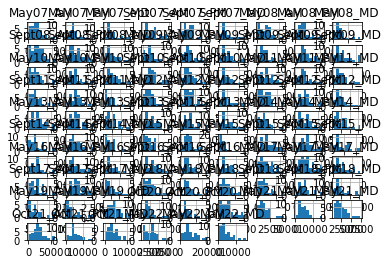

In [19]:
#Plot histograms for continuous features

df.hist().T

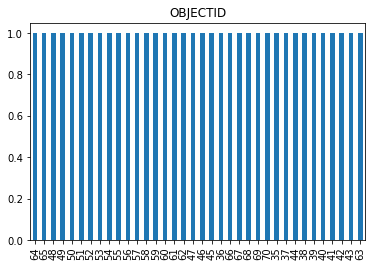

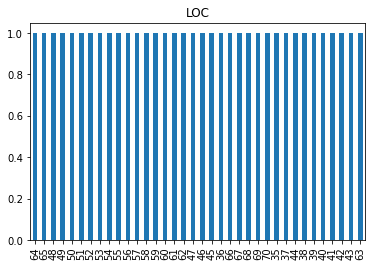

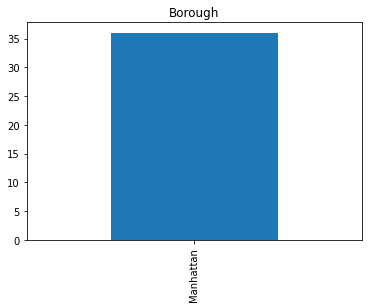

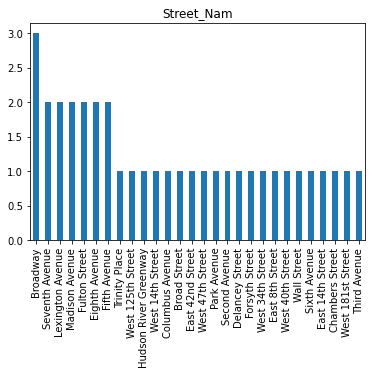

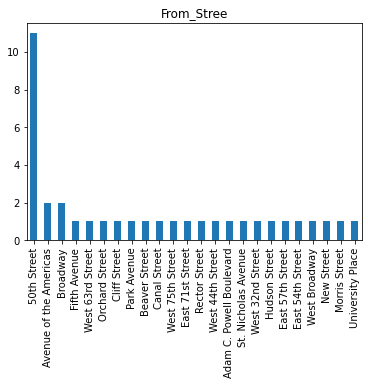

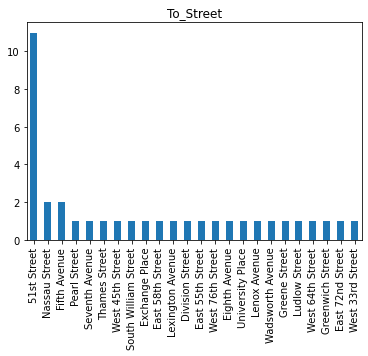

In [20]:
#Plot bar plots for categorical features

for item in categorical:
    df[item].value_counts(dropna=False).plot(kind='bar', title=item)
    plt.show()

In [16]:
#Saving cleaned frame to CSV

df.to_csv('cleaned_pedestrian_df.csv', index=False)